<font size = "5"> **[Image Tools](2_Image_Tools.ipynb)** </font>

<hr style="height:2px;border-top:4px solid #FF8200" />


# Adaptive Fourier Filtering


part of 

<font size = "4"> **pyTEMlib**, a **pycroscopy** library </font>


Notebook by 

Gerd Duscher

Materials Science & Engineering<br>
Joint Institute of Advanced Materials<br>
The University of Tennessee, Knoxville


An introduction into Fourier Filtering of images.


## Install pyTEMlib

If you have not done so in the [Introduction Notebook](_.ipynb), please test and install [pyTEMlib](https://github.com/gduscher/pyTEMlib) and other important packages with the code cell below.


In [3]:
import sys
from pkg_resources import get_distribution, DistributionNotFound

def test_package(package_name):
    """Test if package exists and returns version or -1"""
    try:
        version = (get_distribution(package_name).version)
    except (DistributionNotFound, ImportError) as err:
        version = '-1'
    return version

# pyTEMlib setup ------------------
else:
    if test_package('pyTEMlib') < '0.2023.1.0':
        print('installing pyTEMlib')
        !{sys.executable} -m pip install  --upgrade pyTEMlib -q
# ------------------------------
print('done')

installing pyNSID
doneRequirement already satisfied: pyNSID in c:\users\gduscher\.conda\envs\ase\lib\site-packages (0.0.6)
  Attempting uninstall: pyNSID
    Found existing installation: pyNSID 0.0.6
    Uninstalling pyNSID-0.0.6:
      Successfully uninstalled pyNSID-0.0.6



## Loading of necessary libraries

Please note, that we only need to load the pyTEMlib library, which is based on sidpy Datsets. 



In [3]:
%matplotlib  notebook

import matplotlib.pyplot as plt
import numpy as np

import pyTEMlib
import pyTEMlib.file_tools as ft
import pyTEMlib.image_tools as it

print('pyTEMlib version: ', pyTEMlib.__version__)
note_book_version = '2023.01.20'
note_book_name='pyTEMib/notebooks/Imaging/Adaptive_Fourier_Filter'

Symmetry functions of spglib enabled
SimpleITK not installed; Registration Functions for Image Stacks not available
install with: conda install -c simpleitk simpleitk 
pyTEMlib version:  0.2023.1.0


## Open File

These datasets are stored in the pyNSID data format (extension: hf5) automatically. 

All results can be stored in that file. 

First we select the file and the dataset, in case there are several.

In [10]:
datasets = ft.open_file()
chooser = ft.ChooseDataset(datasets)

{'experiment': {'exposure_time': 1.0, 'microscope': 'Libra 200 MC', 'acceleration_voltage': 199990.28125}}


Dropdown(description='select dataset:', options=('Channel_000: p1-hr4',), value='Channel_000: p1-hr4')

In [6]:
file_name =  '../../example_data/AL-DFoffset0.00.dm3'
datasets = ft.open_file(file_name)
chooser = ft.ChooseDataset(datasets)

{'experiment': {'single_exposure_time': 0.1, 'exposure_time': 10.0, 'number_of_frames': 100, 'collection_angle': 100.0, 'convergence_angle': 0.0, 'microscope': 'Libra 200 MC', 'acceleration_voltage': 199990.28125}}


Dropdown(description='select dataset:', options=('Channel_000: EELS90muOAonaxis3',), value='Channel_000: EELS9…

Now, we open and plot the selected dataset. Select another one and rerun only cell below (Home button gets you back to original).
>
> Please note that you can zoom and drag the intensity values in the colorbar.
>

<IPython.core.display.Javascript object>


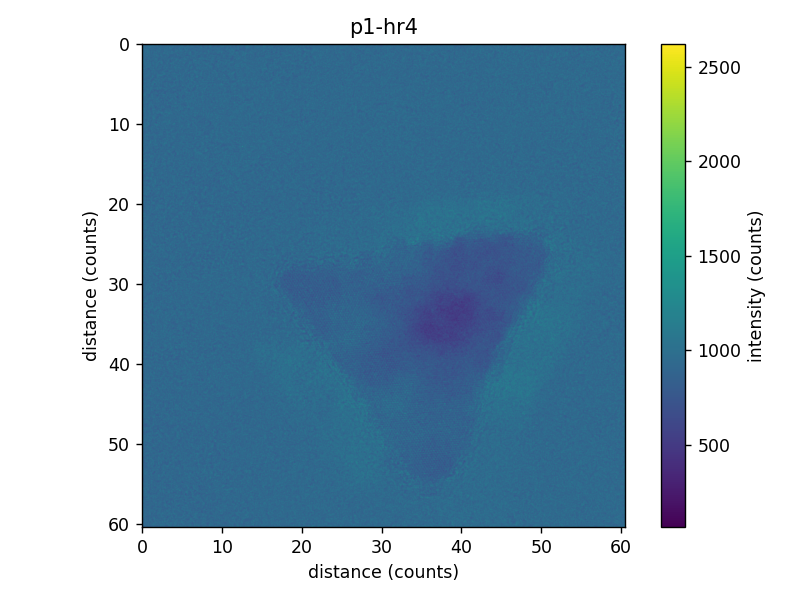

In [11]:
dataset = chooser.dataset

if dataset.data_type.name != 'IMAGE':
    print('We really would need an image here')

view = dataset.plot()

## Power Spectrum of Image

fft :
	smoothing : 1
	minimum_intensity : 10.348526633131083
	maximum_intensity : 16.269362695205977
source:  p1-hr4


<IPython.core.display.Javascript object>


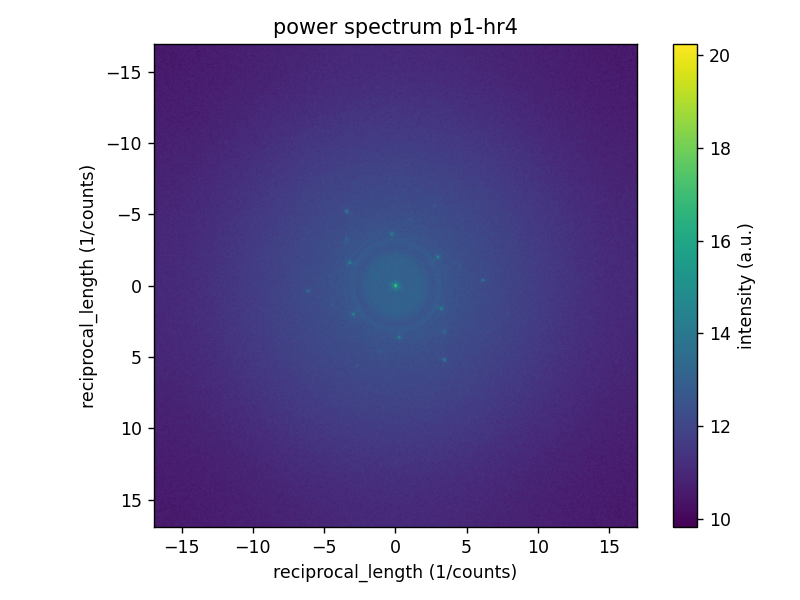

In [12]:
power_spectrum = it.power_spectrum(dataset, smoothing=1)

power_spectrum.view_metadata()
print('source: ', power_spectrum.source)
view = power_spectrum.plot()

## Spot Detection in Fourier Transform

Found 20 reflections


<IPython.core.display.Javascript object>


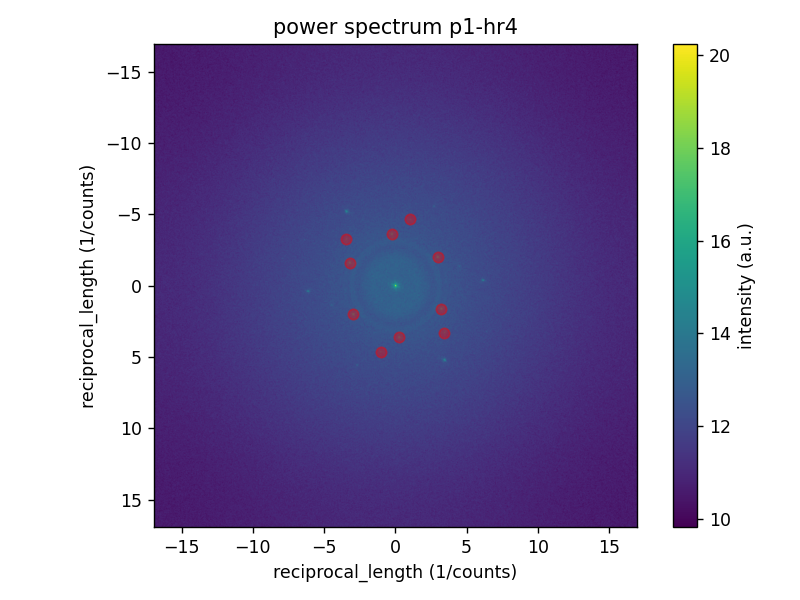

In [16]:
# ------Input----------
spot_threshold=0.05
# ---------------------

spots = it.diffractogram_spots(power_spectrum, spot_threshold=spot_threshold)
spots = spots[np.linalg.norm(spots[:,:2],axis=1)<6,:]
spots = spots[np.linalg.norm(spots[:,:2],axis=1)>0.5,:]
power_spectrum.plot()

plt.gca().scatter(spots[:,0],spots[:,1], color='red', alpha=0.4);

## Adaptive Fourier Filter

<IPython.core.display.Javascript object>


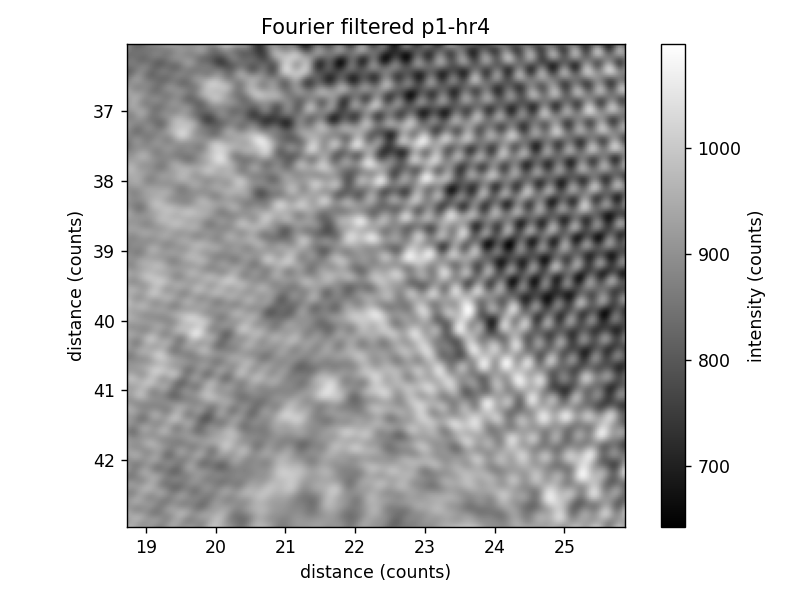

In [19]:
filtered_dataset = it.adaptive_fourier_filter(dataset, spots, low_pass=2.0, reflection_radius=.3)
view = filtered_dataset.plot(cmap='gray')

Let's see what we did - In Fourier space, of course.

fft :
	smoothing : 1
	minimum_intensity : 10.348526633131083
	maximum_intensity : 16.269362695205977
source:  p1-hr4


<IPython.core.display.Javascript object>


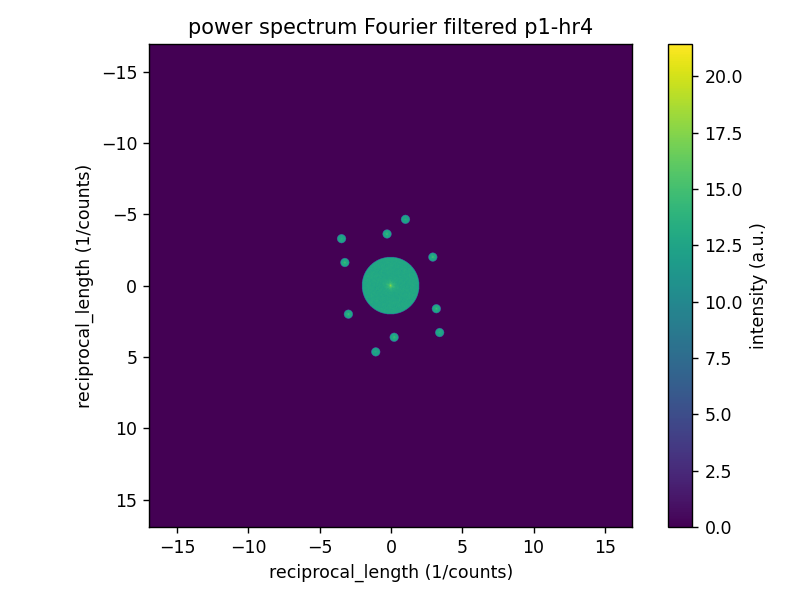

In [21]:
filtered_power_spectrum = it.power_spectrum(filtered_dataset, smoothing=0)

power_spectrum.view_metadata()
print('source: ', power_spectrum.source)
view = filtered_power_spectrum.plot()

Please note that the spots are ordered from center to outside.

The third parameter of a spot is its angle.

In [22]:
print(spots[:5])

[[-2.96019421  2.00102513 -0.97637533]
 [ 2.96019421 -2.00102513  2.16521733]
 [-3.20825517 -1.62066498 -2.03855914]
 [ 3.20825517  1.62066498  1.10303351]
 [-0.24806097 -3.62169012 -3.07320631]]


## Log the result

In [23]:
filtered_dataset.title = 'Fourier_Filtered_Image'
datasets.update({'Log_000': filtered_dataset})

### Save Datasets to file

In [24]:
group = ft.save_dataset(datasets, filename=dataset.metadata['filename'])

C:\Users\gduscher\.conda\envs\ase\lib\site-packages\pyNSID\io\hdf_io.py:111: UserWarning: main_data_name should not contain the "-" character. Reformatted name from:p1-hr4 to p1_hr4
  warn('main_data_name should not contain the "-" character. Reformatted'
C:\Users\gduscher\.conda\envs\ase\lib\site-packages\pyNSID\io\hdf_utils.py:376: FutureWarning: validate_h5_dimension may be removed in a future version
  warn('validate_h5_dimension may be removed in a future version',
C:\Users\gduscher\.conda\envs\ase\lib\site-packages\pyNSID\io\hdf_utils.py:376: FutureWarning: validate_h5_dimension may be removed in a future version
  warn('validate_h5_dimension may be removed in a future version',


A convenient function to select a dataset (for further processing, visualization or whatever)

In [25]:
chooser = ft.ChooseDataset(datasets)

Dropdown(description='select dataset:', options=('Channel_000: p1-hr4', 'Log_000: Fourier_Filtered_Image'), va…

In [31]:
chooser.dataset.metadata

{'analysis': 'adaptive fourier filtered',
 'spots': array([[-9.65317383e-01,  6.43544922e-01, -9.82793723e-01],
        [ 9.65317383e-01, -6.43544922e-01,  2.15879893e+00],
        [ 1.69464442e-12, -1.42499233e+00,  3.14159265e+00],
        [ 1.69464442e-12,  1.42499233e+00,  1.18923056e-12],
        [-1.83869978e+00, -7.35479911e-01, -1.95130270e+00],
        [ 1.83869978e+00,  7.35479911e-01,  1.19028995e+00],
        [ 1.69464442e-12, -2.06853725e+00,  3.14159265e+00],
        [ 1.69464442e-12,  2.06853725e+00,  8.19247720e-13],
        [-2.29837472e+00,  1.69464442e-12, -1.57079633e+00],
        [ 2.29837472e+00,  1.69464442e-12,  1.57079633e+00],
        [-1.93063477e+00,  1.33305734e+00, -9.66490820e-01],
        [ 1.93063477e+00, -1.33305734e+00,  2.17510183e+00],
        [-2.75804967e+00,  1.69464442e-12, -1.57079633e+00],
        [ 2.75804967e+00,  1.69464442e-12,  1.57079633e+00],
        [ 1.69464442e-12, -2.80401716e+00,  3.14159265e+00],
        [ 1.69464442e-12,  2.80401

A tree-like plot of the file

In [26]:
print(dataset.h5_dataset.file.filename)
ft.h5_tree(dataset.h5_dataset.file)

C:/Users/gduscher/Documents/Github/MSE672-Introduction-to-TEM/example_data\p1-hr4-ZnOonGraphite.hf5
/
├ Measurement_000
  ---------------
  ├ Channel_000
    -----------
    ├ p1_hr4
      ------
      ├ metadata
        --------
        ├ experiment
          ----------
      ├ original_metadata
        -----------------
        ├ DM
          --
        ├ DocumentObjectList
          ------------------
          ├ 0
            -
            ├ AnnotationGroupList
              -------------------
              ├ 0
                -
                ├ Font
                  ----
                ├ ObjectTags
                  ----------
            ├ ImageDisplayInfo
              ----------------
              ├ DimensionLabels
                ---------------
              ├ MainSliceId
                -----------
            ├ ObjectTags
              ----------
        ├ DocumentTags
          ------------
        ├ Image Behavior
          --------------
          ├ UnscaledTransfor

## Close File
let's close the file but keep the filename

In [27]:
dataset.h5_dataset.file.close()

## Simulate new notebook
We can now simulate a new notebook and open the file again.



In [3]:
new_dataset= ft.open_file()
choose_image = ft.ChooseDataset(new_dataset)

Dropdown(description='select dataset:', options=('Channel_000: HAADF', 'Log_000: Fourier_Filtered_Image'), val…

<IPython.core.display.Javascript object>


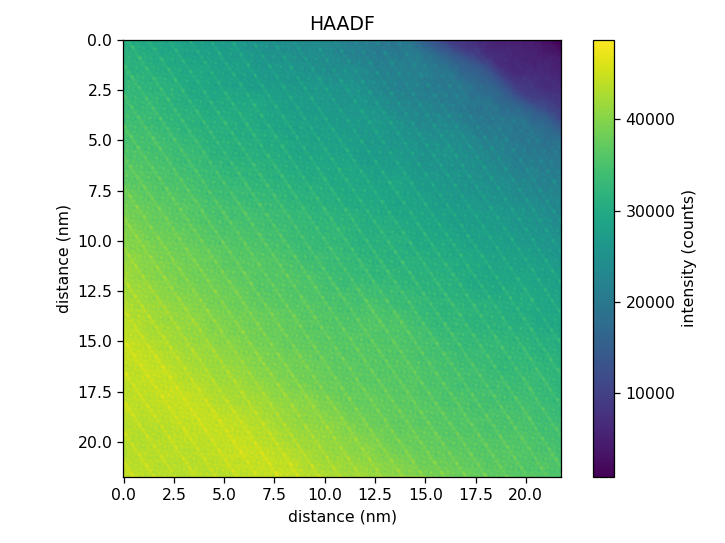

In [5]:
view = choose_image.dataset.plot()

We want to make an image operation of the images in the file.

In [7]:
choose_image = ft.ChooseDataset(new_dataset)
print('       subtract')
choose_image2 = ft.ChooseDataset(new_dataset)

Dropdown(description='select dataset:', options=('Channel_000: HAADF', 'Log_000: Fourier_Filtered_Image'), val…

       subtract


Dropdown(description='select dataset:', options=('Channel_000: HAADF', 'Log_000: Fourier_Filtered_Image'), val…

<IPython.core.display.Javascript object>


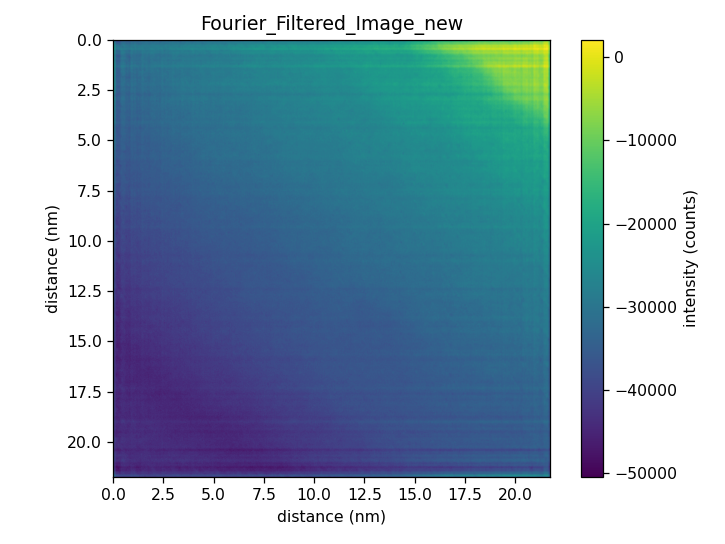

In [10]:
new_image = np.array(choose_image.dataset) - np.array(choose_image2.dataset)
new_image = choose_image.dataset.like_data(new_image)
vew = new_image.plot()